In [2]:
from xgboost import XGBClassifier
from xgboost import plot_importance
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
data = pd.read_csv('violations.csv')
data = data[data['price_$$$$'] == 0].drop('price_$$$$', axis = 1) #getting rid of $$$$ restaurants

display(data.head())
print(data.shape)
print('\n Number of Unique Restaurants: {}'.format(len(data.camis.unique())))

,flag_2,flag_3,camis,dba,02A,02B,02C,02D,02E,02F,...,cuisine_tapas,cuisine_tex-mex,cuisine_thai,cuisine_turkish,cuisine_vegetarian,cuisine_vietnamese/cambodian/malaysia,price_$,price_$$,price_$$$,chain
0,0,0,30075445,MORRIS PARK BAKE SHOP,0.0,0.000000,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,30112340,WENDY'S,0.0,0.000000,0.0,0.0,0,0.0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,30191841,DJ REYNOLDS PUB AND RESTAURANT,0.0,0.000000,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,40356483,WILKEN'S FINE FOOD,0.0,0.000000,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,40356731,TASTE THE TROPICS ICE CREAM,0.0,0.333333,0.0,0.0,0,0.0,...,0,0,0,0,0,0,1,0,0,0


(13960, 192)

 Number of Unique Restaurants: 13960


In [4]:
data.rename(columns = {'price_$' : 'price_low',
                             'price_$$' : 'price_med',
                             'price_$$$' : 'price_high'}, inplace=True)

In [5]:
X = data.drop(['camis', 'dba', 'flag_2', 'flag_3'], axis = 1)
y2 = data['flag_2']
y3 = data['flag_3']

## Take a look on the feature importance

[0.00880054 0.02558749 0.         0.         0.         0.
 0.02472505 0.01225492 0.         0.         0.0118139  0.
 0.         0.         0.         0.         0.         0.01569477
 0.         0.01509445 0.         0.         0.         0.
 0.02581371 0.         0.00750159 0.01600582 0.01211723 0.0164244
 0.01828927 0.         0.         0.         0.         0.01213661
 0.         0.0169609  0.00617841 0.00820271 0.01473263 0.0192711
 0.01172765 0.01379155 0.01219011 0.         0.         0.
 0.         0.02157388 0.00737478 0.01284307 0.01525682 0.01182606
 0.00913351 0.00925572 0.00842549 0.         0.00906696 0.00895813
 0.01697707 0.         0.01261302 0.00807774 0.01283588 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.       

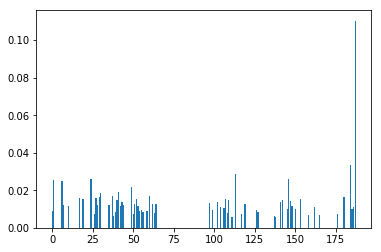

In [7]:
model = XGBClassifier()
model.fit(X, y2)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

plt.rcParams["figure.figsize"] = (14, 20)
plot_importance(model)
plt.show()

plt.figure(figsize=(12,10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# xgboost modeling part

In [6]:
len(y2[y2 == 0])

10633

In [7]:
len(y2[y2 == 1])

3327

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


def data_processor():

    print('Use StandardScaler to process the column data')
    scaler = StandardScaler()
    data[data.columns[4:].tolist()] = scaler.fit_transform(data[data.columns[4:].tolist()])
    X = data[data.columns[4:].tolist()]
    y = data['flag_2']
    #y = data['flag_3']

    print("Train Test Split ratio is 0.3")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")

    return X_train, X_test, y_train, y_test

def xgb_classifier(X_train, X_test, y_train, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    """
    flag2:
    Accuracy : 0.5702
    ROC_AUC_SCORE: 0.606484
    F1 Score: 0.382292
    flag3:
    
    """
 
    alg = XGBClassifier(n_estimators=100,scale_pos_weight=10633/3327, seed=27)

    if useTrainCV:
        print("Start Feeding Data")
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    print('Start Training')
    alg.fit(X_train, y_train, eval_metric='auc')

    print("Start Predicting")
    predictions = alg.predict(X_test)
    pred_proba = alg.predict_proba(X_test)[:, 1]

    print("Modeling on Flag 2")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))
    print("ROC_AUC_SCORE: %f" % metrics.roc_auc_score(y_test, pred_proba))
    print("F1 Score: %f" % metrics.f1_score(y_test, predictions))
    print('The accuracy of the xgboost classifier is {:.2f} out of 1 on the training data'.format(alg.score(X_train, y_train)))
    print('The accuracy of the xgboost classifier is {:.2f} out of 1 on the test data'.format(alg.score(X_test, y_test)))

    feat_imp = alg.feature_importances_
    feat = X_train.columns.tolist()
    result_info = pd.DataFrame({'Accuracy': [metrics.accuracy_score(y_test, predictions)],
                               'F-Score': [metrics.f1_score(y_test, predictions)],
                               'ROC-AUC-Score': [metrics.roc_auc_score(y_test, pred_proba)]})
    res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
    print("Out-of-Sample Results: \n")
    display(result_info)
    print("")
    print("Feature Importances: \n")
    display(res_df[:9])


if __name__ == "__main__":
    X_train, X_test, y_train, y_test = data_processor()
    xgb_classifier(X_train, X_test, y_train, y_test)

Use StandardScaler to process the column data
Train Test Split ratio is 0.3
X_train shape: (9772, 188)
y_train shape: (9772,)
Start Feeding Data
Start Training
Start Predicting
Modeling on Flag 2
Accuracy : 0.5728
ROC_AUC_SCORE: 0.608846
F1 Score: 0.393765
The accuracy of the xgboost classifier is 0.63 out of 1 on the training data
The accuracy of the xgboost classifier is 0.57 out of 1 on the test data
Out-of-Sample Results: 



,Accuracy,F-Score,ROC-AUC-Score
0,0.572827,0.393765,0.608846



Feature Importances: 



,Features,Importance
187,chain,0.141329
184,price_low,0.035881
6,02G,0.031703
113,cuisine_cafe/coffee/tea,0.022692
30,04N,0.021743
24,04H,0.020810
141,"cuisine_ice cream, gelato, yogurt, ices",0.018922
1,02B,0.018487
35,05D,0.018479


# flag_3=============

In [20]:
len(y3[y3 == 0])

13252

In [21]:
len(y3[y3 == 1])

708

In [61]:
def data_processor():

    #features_to_select = ['06D','04C','10F','02B','06C','04M','02G',
     #                     'rating','chain','04N','06E','08A','price_low',
      #                   '08C','06B','cuisine_cafe/coffee/tea','04A','10B','cuisine_american','04H']

    print('Use StandardScaler to process the column data')
    scaler = StandardScaler()
    #X = data[features_to_select]
    #y = data['flag_3']
    data[data.columns[4:].tolist()] = scaler.fit_transform(data[data.columns[4:].tolist()])
    X = data[data.columns[4:].tolist()]
    #data[X.tolist()] = scaler.fit_transform(data[X.tolist])
    #X = data[X.tolist()]
    #X = X[features_to_select]
    #y = data['flag_2']
    y = data['flag_3']

    print("Train Test Split ratio is 0.3")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")

    return X_train, X_test, y_train, y_test

def xgb_classifier(X_train, X_test, y_train, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
   
    alg = XGBClassifier(learning_rate=0.1, n_estimators=140,
                        scale_pos_weight=13252/708, seed=27)

    if useTrainCV:
        print("Start Feeding Data")
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        # xgtest = xgb.DMatrix(X_test.values, label=y_test.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    print('Start Training')
    alg.fit(X_train, y_train, eval_metric='auc')

    print("Start Predicting")
    predictions = alg.predict(X_test)
    pred_proba = alg.predict_proba(X_test)[:, 1]

    print("Modeling on flag 3")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))
    print("ROC_AUC_SCORE: %f" % metrics.roc_auc_score(y_test, pred_proba))
    print("F1 Score: %f" % metrics.f1_score(y_test, predictions))
    print('The accuracy of the xgboost classifier is {:.2f} out of 1 on the training data'.format(alg.score(X_train, y_train)))
    print('The accuracy of the xgboost classifier is {:.2f} out of 1 on the test data'.format(alg.score(X_test, y_test)))

    feat_imp = alg.feature_importances_
    feat = X_train.columns.tolist()
    # clf.best_estimator_.booster().get_fscore()
    res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
    #res_df.plot('Features', 'Importance', kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')
    #plt.show()
    #print(res_df)
    #print(res_df["Features"].tolist())
    display(res_df[:10])

if __name__ == "__main__":
    # logistic_regression()
    # randomForest()
    # logistic_with_smote()
    # neural_nets()
    X_train, X_test, y_train, y_test = data_processor()
    xgb_classifier(X_train, X_test, y_train, y_test)
    #randomForest()
    #print("Total Time is: ", (time.time() - start)/60)

Use StandardScaler to process the column data
Train Test Split ratio is 0.3
X_train shape: (9772, 188)
y_train shape: (9772,)
Start Feeding Data
Start Training
Start Predicting
Modeling on flag 3
Accuracy : 0.7199
ROC_AUC_SCORE: 0.686106
F1 Score: 0.159140
The accuracy of the xgboost classifier is 0.75 out of 1 on the training data
The accuracy of the xgboost classifier is 0.72 out of 1 on the test data


,Features,Importance
187,chain,0.076478
113,cuisine_cafe/coffee/tea,0.028019
6,02G,0.027198
60,10F,0.024565
29,04M,0.023584
49,08A,0.022929
58,10D,0.022822
183,cuisine_vietnamese/cambodian/malaysia,0.021129
171,cuisine_seafood,0.020228
1,02B,0.018734


In [26]:
train = X
target = data['flag_2']

## tunning the parameter for the xgboost model

In [27]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=10633/3327, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,target)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([11.27005725, 10.99113531, 11.07295275, 16.84404335, 17.1203373 ,
         17.78354478, 26.42030778, 25.48582468, 25.54753351, 38.28571019,
         38.04967117, 34.96812701]),
  'std_fit_time': array([0.14318689, 0.11322246, 0.07811844, 0.19564493, 0.25748904,
         0.28224657, 0.84693746, 0.59791054, 0.95878532, 3.13795673,
         0.81772292, 3.71621126]),
  'mean_score_time': array([0.0786623 , 0.08951025, 0.07481866, 0.08192921, 0.09993162,
         0.1044476 , 0.14922819, 0.16104321, 0.12334962, 0.28647118,
         0.30386581, 0.18987403]),
  'std_score_time': array([0.01062304, 0.03654714, 0.02105742, 0.01911739, 0.03912426,
         0.02718472, 0.06227775, 0.04246167, 0.03280293, 0.03105015,
         0.0516746 , 0.10201842]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [28]:
param_test1 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=10633/3327, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.02550392, 0.93099365, 0.94241419, 1.25503559, 1.32300768,
         1.26821165, 1.6098465 , 1.60372882, 1.45593071]),
  'std_fit_time': array([0.07230567, 0.00309462, 0.01662688, 0.01500947, 0.03844297,
         0.01064324, 0.0184245 , 0.00981926, 0.17217703]),
  'mean_score_time': array([0.0145196 , 0.01255956, 0.01204915, 0.01713562, 0.01350932,
         0.01933393, 0.01777887, 0.02501373, 0.0137002 ]),
  'std_score_time': array([0.00110077, 0.00143857, 0.00145832, 0.00125151, 0.00219648,
         0.00788636, 0.00374333, 0.00702226, 0.00245336]),
  'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         

In [32]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=10633/3327, seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=4,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=3.1959723474601742,
                                     seed=27, silent=None, subsample=0.8,
                                     verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'min_child_weight': [6, 8, 10, 12]},
             pre_dispatch='2*n_jobs', refit=True, return

In [33]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=10633/3327,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([1.0337883 , 0.95942483, 1.07972207, 1.00858855, 0.85564451]),
  'std_fit_time': array([0.01941931, 0.02638892, 0.11004292, 0.09306688, 0.19867386]),
  'mean_score_time': array([0.0141377 , 0.01326261, 0.02521014, 0.01323447, 0.01103692]),
  'std_score_time': array([0.00289601, 0.00203475, 0.01358232, 0.00247625, 0.00273392]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.60153233, 0.60153233, 0.60153233, 0.60153233, 0.60153233]),
  'split1_test_score': array([0.62930095, 0.62930095, 0.62930095, 0.62930095, 0.62930095]),
  'split2_test_score': array([0.60693199, 0.60693199, 0.60693199, 0.60693199, 0.60693199]),
  'split3_test_score': array([0.61149618, 0.61149618, 0.61149618, 0.61149618, 0.61149618]),

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.30, random_state=0)

In [34]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=10633/3327,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([1.08035579, 0.95205317, 0.88101363, 0.85069418, 0.94706211,
         0.94319649, 0.89068742, 0.87585044, 1.019945  , 0.98355169,
         0.93505597, 1.0534174 , 1.07336326, 1.01037507, 0.99355054,
         0.96852341]),
  'std_fit_time': array([0.07566371, 0.01713484, 0.01796023, 0.03683053, 0.01122827,
         0.01796641, 0.01332999, 0.01984169, 0.02267468, 0.01267825,
         0.00710316, 0.06555266, 0.04053763, 0.00576493, 0.02229899,
         0.07375418]),
  'mean_score_time': array([0.01420379, 0.01367192, 0.01211743, 0.01969109, 0.01367059,
         0.01313968, 0.01454601, 0.01303678, 0.01401229, 0.01417603,
         0.01514549, 0.01257238, 0.01424432, 0.01434202, 0.01195779,
         0.0127254 ]),
  'std_score_time': array([0.00269784, 0.00334497, 0.00106392, 0.00608497, 0.00056533,
         0.00180689, 0.00179996, 0.00204123, 0.00246313, 0.00134587,
         0.00231709, 0.00178779, 0.00291056, 0.00251364, 0.00169067,
         0.00167433]),
  'param_c

In [60]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=2,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=4,
                                     missing=None, n_estimators=177, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'subsample': [0.75, 0.8, 0.85]},
             pre_dispatch='2*n_jobs', refit=True, 